In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.chdir('../code')

In [3]:
from data import TGSSaltDataset
from data.transforms import TGSTransform, HShear
import pandas as pd
import matplotlib.pyplot as plt
import albumentations as A
import numpy as np
from utils.viz import plot_mask_on_img

In [24]:
root_ds = '../dataset'
train_df = pd.read_csv(os.path.join(root_ds, 'folds.csv'), index_col='id').reset_index()
nonaug_ds = TGSSaltDataset(root_ds, train_df, transforms=None)
aug_ds = TGSSaltDataset(root_ds, train_df, transforms=TGSTransform(augment=True, add_depth=False))

In [25]:
train_df

,id,z,fold,unique_pixels
0,1c0b2ceb2f,71,0,1
1,16bee00afc,409,3,214
2,e82162c83c,884,3,240
3,97e78a5448,694,1,211
4,2edf2e3e05,439,3,135
...,...,...,...,...
3995,94e7558e32,441,3,175
3996,d83a74a082,596,0,186
3997,89af21b6ee,513,0,210
3998,94c2d96e56,172,3,171


In [38]:
img, mask = nonaug_ds[3]
img = np.array(img)
mask = np.array(mask)

In [39]:
img

array([[108, 105, 104, ..., 165, 165, 163],
       [113, 110, 108, ..., 161, 161, 161],
       [120, 116, 113, ..., 157, 157, 157],
       ...,
       [129, 121, 113, ..., 144, 145, 147],
       [150, 142, 134, ..., 149, 147, 146],
       [166, 159, 151, ..., 155, 150, 146]], dtype=uint8)

In [40]:
mask

array([[  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [41]:
augs_options = {
    'HFlip':A.HorizontalFlip(p=1.0),
    'HShear':HShear((0.19, 0.2), p=1.0),
    'RandomResizedCrop':A.RandomResizedCrop(width=101, height=101, p=1.0),
    'RandomRotate':A.Rotate(limit=(14, 15), p=1.0),
    'RandomBrightnessContrast':A.RandomBrightnessContrast(brightness_limit=0.1, p=1.0),
}

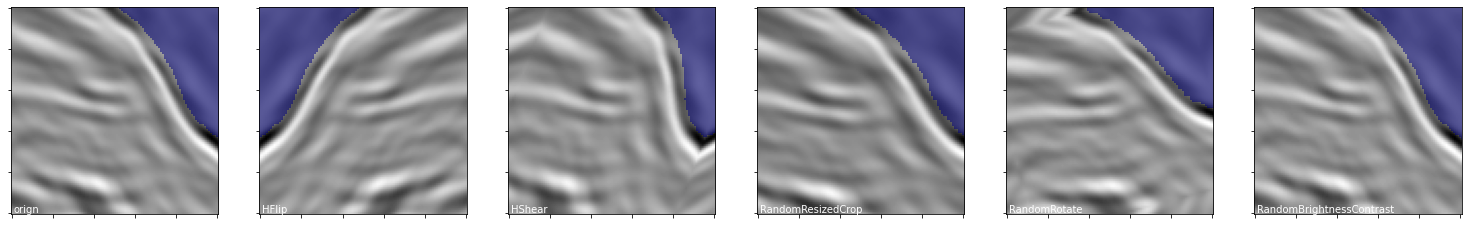

In [42]:
fig, axs = plt.subplots(1, len(augs_options) + 1, figsize=(5 * len(augs_options) + 1, 5))
plot_mask_on_img(axs[0], img, mask)
axs[0].text(1, 100, 'orign', color="white")
for i, (k, trans) in enumerate(augs_options.items()):
    aug = trans(image=img, mask=mask)
    plot_mask_on_img(axs[i + 1], aug['image'], aug['mask'])
    axs[i + 1].text(1, 100, k, color="white")

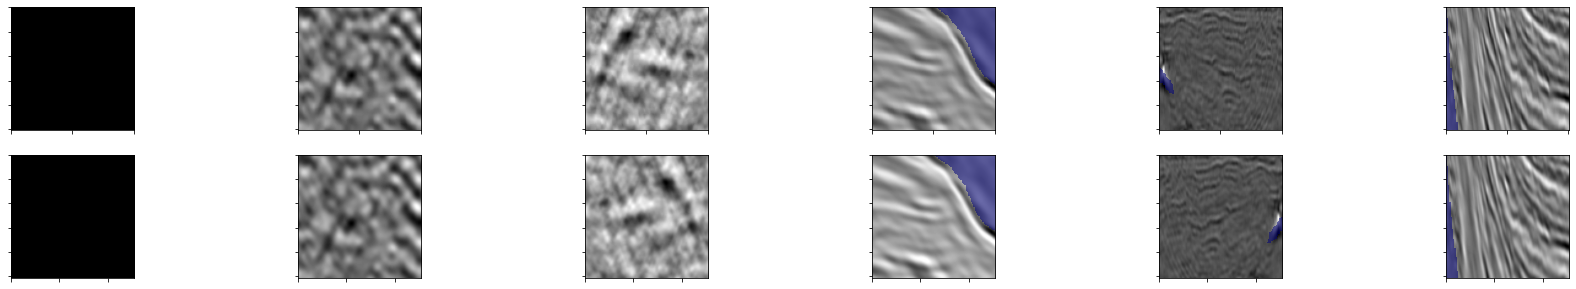

In [43]:
num_sample = 6
fig, axs = plt.subplots(2, num_sample, figsize=(5 * num_sample, 5))
for i in range(num_sample):
    img, mask = nonaug_ds[i]
    img = np.array(img)
    mask = np.array(mask)
    plot_mask_on_img(axs[0, i], img.squeeze(), mask.squeeze())
    img_aug, mask_aug = aug_ds[i]
    plot_mask_on_img(axs[1, i], img_aug.squeeze(), mask_aug.squeeze())

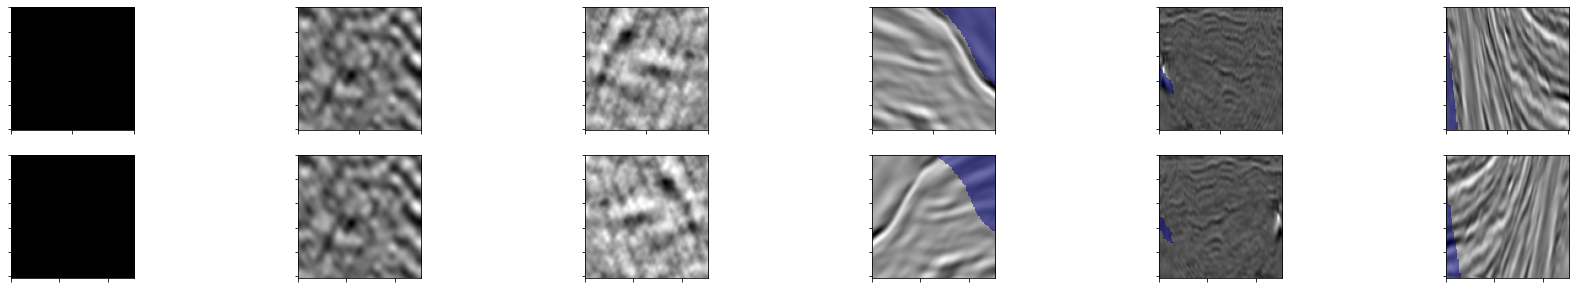

In [44]:
num_sample = 6
fig, axs = plt.subplots(2, num_sample, figsize=(5 * num_sample, 5))
for i in range(num_sample):
    img, mask = nonaug_ds[i]
    img = np.array(img)
    mask = np.array(mask)
    plot_mask_on_img(axs[0, i], img.squeeze(), mask.squeeze())
    img_aug, mask_aug = aug_ds[i]
    img_aug = img_aug.flip(-1)
    plot_mask_on_img(axs[1, i], img_aug.squeeze(), mask_aug.squeeze())